In [1]:
from master_thesis.src import utils, data
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

import scipy.stats as st

import matplotlib.pyplot as plt

In [2]:
#full = pd.read_csv(utils.DATA / 'combined_textCrawling.tsv', sep='\t')
full = utils.get_raw_df()

Shape of raw df: (97760, 20)


In [3]:
full.shape

(97760, 20)

In [4]:
full.head()

,date,avgTimeOnPage,avgTimeOnPagePerWordcount,timeOnPage,rubric,category,prozentVerlag,dpaGuid,article_text,pageviews,titel,zeilen,exits,nr_tokens_text,nr_tokens_publisher,publisher,prozentDpa,bounces,pagePath,entrances
articleId,,,,,,,,,,,,,,,,,,,,
SZ_16591,NaN,47.587949,0.088949,48968.0,recht,sz-spezial,NaN,NaN,Coburg Sehr viele Eltern haben eine Vollmacht ...,2411,Sparbuch der Kinder ist tabu : Urteil: Vater d...,NaN,1382,535,535,SZ,NaN,76,NaN,1382
SZ_16595,NaN,40.826923,0.163308,2123.0,recht,sz-spezial,NaN,NaN,Berlin Das Verwaltungsgericht Berlin hat entsc...,92,Gewalt in der Schule : Faustschlag ins Gesicht...,NaN,40,250,250,SZ,NaN,6,NaN,41
SZ_16723,NaN,38.501931,0.166675,9972.0,recht,sz-spezial,NaN,NaN,Coburg Nicht jeder Rohrbruch ist versichert: B...,567,Abflussrohr der Dachrinne defekt: Gebäudeversi...,NaN,308,231,231,SZ,NaN,26,NaN,308
SZ_17146,NaN,98.246154,0.125154,6386.0,momente,magazine,NaN,NaN,Alfons Hewener heiratete erst spät. Wadgassen....,101,„Er war die Liebe meines Lebens“,NaN,36,785,785,SZ,NaN,1,NaN,38
SZ_17184,NaN,70.817518,0.177933,9702.0,recht,sz-spezial,NaN,NaN,München Ein Käufer kann erst dann von einem Ka...,261,Neuer Laptop kaputt - Rücktritt vom Kauf möglich?,NaN,124,398,398,SZ,NaN,9,NaN,125


In [7]:
df = full[full.nr_tokens_text >= 100]

In [8]:
df.publisher.value_counts()

NOZ    42863
SZ     31399
TV     20375
Name: publisher, dtype: int64

In [9]:
df.category.value_counts()

saarland                                                                    24361
lokales                                                                     20317
region                                                                      15508
deutschland-und-welt                                                        10529
sport                                                                        4998
nachrichten                                                                  3396
sz-spezial                                                                   1357
blaulicht                                                                    1026
pm                                                                            819
magazin                                                                       344
meinung                                                                       313
politik                                                                       240
newsletter      

In [10]:
# publisher dict
#publ_encoding = {'TV': 0,
#                 'SZ': 1,
#                 'aachener': 2,
#                 'bonn': 3,
#                 'NOZ': 4}

In [11]:
# get one hot encoding of publisher
publisher_one_hot = pd.get_dummies(full['publisher'])
publisher_one_hot.to_csv(utils.OUTPUT / f'meta_file_publisher.csv', index=True) # save to file

In [12]:
publisher_one_hot

,NOZ,SZ,TV
articleId,,,
SZ_16591,0,1,0
SZ_16595,0,1,0
SZ_16723,0,1,0
SZ_17146,0,1,0
SZ_17184,0,1,0
...,...,...,...
NOZ_2138333,1,0,0
NOZ_2138370,1,0,0
NOZ_2138389,1,0,0


In [13]:
full.index

Index(['SZ_16591', 'SZ_16595', 'SZ_16723', 'SZ_17146', 'SZ_17184', 'SZ_17228',
       'SZ_17232', 'SZ_17250', 'SZ_17256', 'SZ_17295',
       ...
       'NOZ_2138295', 'NOZ_2138300', 'NOZ_2138307', 'NOZ_2138313',
       'NOZ_2138327', 'NOZ_2138333', 'NOZ_2138370', 'NOZ_2138389',
       'NOZ_2138412', 'NOZ_2138415'],
      dtype='object', name='articleId', length=97760)

In [15]:
subject_meta = pd.read_csv(utils.OUTPUT / 'subject_meta.tsv', sep = "\t", index_col = "articleId")
subject_meta = subject_meta.loc[full.index]
subject_meta

,Automobilindustrie,Bundesregierung,EU,Fernsehen,Film,Finanzen,Formel 1,Fußball,Gesellschaft,Gesundheit,...,Medien,Motorsport,Musik,Partei,Prozess (Gericht),Regierung,Tourismus,Verbraucher,Verkehr,Wissenschaft
articleId,,,,,,,,,,,,,,,,,,,,,
49297055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49307973,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49308055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49308139,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49308293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53493609,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53494551,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53501971,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## mean values for each category

In [16]:
# get one hot encoding of column 'category'
category_one_hot = pd.get_dummies(full['category'])
category_one_hot.to_csv(utils.OUTPUT / f'meta_file_category.csv', index=True) # save to file

In [17]:
category_one_hot

,ku,pl,rs,sp,vm,wi
articleId,,,,,,
49297055,0,0,0,0,1,0
49307973,0,0,0,0,1,0
49308055,0,1,0,0,0,0
49308139,0,1,0,0,0,0
49308293,0,0,0,0,1,0
...,...,...,...,...,...,...
53493609,0,1,0,0,0,0
53494551,0,0,0,0,1,0
53501971,0,0,0,0,1,0


In [18]:
category_one_hot.shape

(7820, 6)

In [19]:
full.loc[49310591].category

'wi'

In [20]:
categories = ['vm', 'pl', 'ku', 'wi', 'sp', 'rs']

In [21]:
categories

['vm', 'pl', 'ku', 'wi', 'sp', 'rs']

Bedeutung der Ressortkürzel:\
pl : Politik\
wi : Wirtschaft\
ku : Kultur\
sp : Sport\
vm : Vermischtes\
rs : Redaktioneller Service, wie Kurzdienst, Hinweise, etc.

In [14]:
import collections

In [15]:
def get_category_mean(df, columns):
    category_mean = collections.defaultdict(dict)
    for cat in categories:
        tmp = df[df.category == cat]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                category_mean[cat][col] = mean
            category_mean[cat]["count"] = len(tmp)
    return category_mean

In [16]:
def get_publisher_mean(df, columns):
    publisher_mean = collections.defaultdict(dict)
    for publ in full.publisher.value_counts().keys():
        tmp = df[df.publisher == publ]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                publisher_mean[publ][col] = mean
            publisher_mean[publ]["count"] = len(tmp)
    return publisher_mean

In [17]:
col_list = ['pageviews', 'nr_tokens_publisher', 'zeilen', 'timeOnPage', 'avgTimeOnPage', 'avgTimeOnPagePerWordcount']#, 'stickiness']

#pd.DataFrame.from_dict(get_category_mean(df = df, columns = col_list), orient='index')

In [18]:
#pd.DataFrame.from_dict(get_category_mean(df = full, columns = col_list), orient='index')

In [19]:
pd.DataFrame.from_dict(get_publisher_mean(df = df, columns = col_list), orient='index')

,pageviews,nr_tokens_publisher,zeilen,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,count
NOZ,1544.058,477.863,46.183,89225.851,191.371,0.492,42863
SZ,1105.994,466.976,48.135,21998.580,57.322,0.165,31399
TV,1372.155,493.060,45.358,32881.192,51.737,0.140,20375


## using category or publisher label matrix as features --> so: predicting average value

In [20]:
full = utils.get_raw_df()
full.reset_index(inplace=True)
df = full[full.nr_tokens_text >= 100]
print(df.shape)

Shape of raw df: (97760, 20)
(94637, 21)


In [21]:
df_train, df_dev, df_test = data.create_train_dev_test(df, random_seed = 123)

In [22]:
df_train.shape, df_dev.shape, df_test.shape, 

((75709, 21), (9464, 21), (9464, 21))

In [23]:
df_train.head()

,articleId,date,avgTimeOnPage,avgTimeOnPagePerWordcount,timeOnPage,rubric,category,prozentVerlag,dpaGuid,article_text,...,titel,zeilen,exits,nr_tokens_text,nr_tokens_publisher,publisher,prozentDpa,bounces,pagePath,entrances
0,SZ_34787889,NaN,50.185484,0.067003,6223.0,sz-wirtschaft,wirtschaft,NaN,NaN,Saarbrücken Sie ist vor vier Jahren aus Syrien...,...,Flüchtlinge als Gründer : Avesta Isso macht si...,NaN,101,749,749,SZ,NaN,5,NaN,105
1,SZ_45518193,NaN,73.720000,0.228944,3686.0,saar-pfalz-kreis,saarland,NaN,NaN,Reinheim Bei der konstituierenden Sitzung des ...,...,Aus der Kommunalpolitik : Peter Wagner heißt d...,NaN,33,322,322,SZ,NaN,2,NaN,31
2,SZ_51899361,NaN,109.162100,0.992383,47813.0,merzig-wadern,saarland,NaN,NaN,Weiskirchen Hässliche Szenen im Landkreis Merz...,...,Ermittlungen eingeleitet : „Heil Hitler“-Rufe ...,NaN,980,110,110,SZ,NaN,314,NaN,926
3,NOZ_2052584,20200514.0,132.196429,0.359229,7403.0,politik,deutschland-und-welt,73.0,200513-99-47363,Verbot von Preiswerbung gefordert: CSU-Politik...,...,"Schweinefleisch sind\nunethisch""",34.0,27,368,368,NOZ,97.0,14,https://www.noz.de/deutschland-welt/politik/ar...,20
4,TV_6737541,NaN,11.920000,0.037250,894.0,hunsrueck,region,NaN,NaN,Bausendorf Mitglieder des Reit- und Zuchtverei...,...,"Reiten, um anderen zu helfen",NaN,58,320,320,TV,NaN,6,NaN,60


In [24]:
df_train.set_index('articleId', inplace=True)
df_dev.set_index('articleId', inplace=True)
df_test.set_index('articleId', inplace=True)

In [25]:
df_train.head()

,date,avgTimeOnPage,avgTimeOnPagePerWordcount,timeOnPage,rubric,category,prozentVerlag,dpaGuid,article_text,pageviews,titel,zeilen,exits,nr_tokens_text,nr_tokens_publisher,publisher,prozentDpa,bounces,pagePath,entrances
articleId,,,,,,,,,,,,,,,,,,,,
SZ_34787889,NaN,50.185484,0.067003,6223.0,sz-wirtschaft,wirtschaft,NaN,NaN,Saarbrücken Sie ist vor vier Jahren aus Syrien...,225,Flüchtlinge als Gründer : Avesta Isso macht si...,NaN,101,749,749,SZ,NaN,5,NaN,105
SZ_45518193,NaN,73.720000,0.228944,3686.0,saar-pfalz-kreis,saarland,NaN,NaN,Reinheim Bei der konstituierenden Sitzung des ...,83,Aus der Kommunalpolitik : Peter Wagner heißt d...,NaN,33,322,322,SZ,NaN,2,NaN,31
SZ_51899361,NaN,109.162100,0.992383,47813.0,merzig-wadern,saarland,NaN,NaN,Weiskirchen Hässliche Szenen im Landkreis Merz...,1418,Ermittlungen eingeleitet : „Heil Hitler“-Rufe ...,NaN,980,110,110,SZ,NaN,314,NaN,926
NOZ_2052584,20200514.0,132.196429,0.359229,7403.0,politik,deutschland-und-welt,73.0,200513-99-47363,Verbot von Preiswerbung gefordert: CSU-Politik...,83,"Schweinefleisch sind\nunethisch""",34.0,27,368,368,NOZ,97.0,14,https://www.noz.de/deutschland-welt/politik/ar...,20
TV_6737541,NaN,11.920000,0.037250,894.0,hunsrueck,region,NaN,NaN,Bausendorf Mitglieder des Reit- und Zuchtverei...,133,"Reiten, um anderen zu helfen",NaN,58,320,320,TV,NaN,6,NaN,60


In [26]:
train_ids = df_train.index.tolist()
dev_ids = df_dev.index.tolist()
test_ids = df_test.index.tolist()

In [27]:
len(train_ids), len(dev_ids), len(test_ids)

(75709, 9464, 9464)

In [28]:
full.set_index("articleId", inplace=True)

In [29]:
full.shape

(97760, 20)

In [30]:
#publisher_one_hot.shape, category_one_hot.shape, subject_meta.shape, full[['nr_tokens_publisher']].shape

In [31]:
publisher_one_hot.head()

,NOZ,SZ,TV
articleId,,,
SZ_16591,0,1,0
SZ_16595,0,1,0
SZ_16723,0,1,0
SZ_17146,0,1,0
SZ_17184,0,1,0


In [32]:
print(publisher_one_hot.shape)

(97760, 3)


In [33]:
full[['nr_tokens_publisher']].head()

,nr_tokens_publisher
articleId,
SZ_16591,535
SZ_16595,250
SZ_16723,231
SZ_17146,785
SZ_17184,398


In [34]:
print(full[['nr_tokens_publisher']].shape)

(97760, 1)


In [254]:
combined = pd.concat( [publisher_one_hot, category_one_hot, subject_meta, full[["nr_tokens_publisher"]] ], axis=1)
combined.head()
#combined.shape

NameError: name 'category_one_hot' is not defined

In [35]:
#one_hot = category_one_hot
#feature_df = subject_meta # ist eigentlich nicht "one-hot" weil mehrere 1 sein können...
#feature_df = combined[["nr_tokens_publisher"]] # just nr_tokens_publisher
#feature_df = combined[["SZ", "TV", "aachener", "bonn", "nr_tokens_publisher"]]

#feature_df = combined

#feature_df = publisher_one_hot
#feature_df = full[["nr_tokens_publisher"]]

feature_df = pd.concat([publisher_one_hot, full[["nr_tokens_publisher"]] ],  axis=1)




In [36]:
#full.readTimeNum.describe()

In [37]:
feature_df.head()

,NOZ,SZ,TV,nr_tokens_publisher
articleId,,,,
SZ_16591,0,1,0,535
SZ_16595,0,1,0,250
SZ_16723,0,1,0,231
SZ_17146,0,1,0,785
SZ_17184,0,1,0,398


In [38]:
feature_df.shape

(97760, 4)

In [39]:
X_train = np.array(feature_df.loc[train_ids])
X_dev = np.array(feature_df.loc[dev_ids])
X_test = np.array(feature_df.loc[test_ids])

In [40]:
X_train.shape, X_dev.shape, X_test.shape

((75709, 4), (9464, 4), (9464, 4))

In [41]:
X_train

array([[  0,   1,   0, 749],
       [  0,   1,   0, 322],
       [  0,   1,   0, 110],
       ...,
       [  0,   1,   0, 293],
       [  0,   1,   0, 169],
       [  0,   1,   0, 340]])

In [42]:
# check one example
print(dev_ids[0])
print(category_one_hot.loc[51604595])
print(X_dev[0])
print(df.set_index('articleId').loc[51604595]['category'])

SZ_33127283


NameError: name 'category_one_hot' is not defined

In [47]:
# define the target label
#target = 'avgTimeOnPagePerWordcount'
#target = 'avgTimeOnPagePerRow'

#target = 'stickiness'
target = 'avgTimeOnPage'

#target = 'pageviews'
#target = 'score_pageviews'
#target = 'pageviews_percentile'

# target = 'nr_tokens_text'

y_train = np.array(df_train[target])
y_dev = np.array(df_dev[target])
y_test = np.array(df_test[target])

In [48]:
y_train.shape, y_dev.shape, y_test.shape

((75709,), (9464,), (9464,))

In [49]:
from sklearn.linear_model import Ridge, LinearRegression, SGDRegressor

In [50]:
model = Ridge()

In [51]:
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
# predict for dev set
pred_dev = model.predict(X_dev)

In [53]:
# postprocessing: replace negative values with 0 (better way? can I give that hint to the model?)
pred_dev[pred_dev < 0] = 0
pred_dev

array([ 43.09476389, 205.94076006,  62.78529377, ..., 167.64647381,
       252.03573425,  57.68306342])

In [54]:
np.array(y_dev)

array([ 32.24183007, 260.53703704,  36.71428571, ..., 161.49257426,
       265.75434243,  60.88      ])

In [55]:
st.pearsonr(pred_dev, y_dev) # publisher alleine ist schon 0.57..., nr_tokens alleine 0.25
                             # publisher + nr_tokens_publisher ist 0.62
                            
                             # der Publisher ist also entscheidend...
                             # interessanterweise war das bei nur SZ und TV nicht so
                             # (die unterscheiden sich von den Mittelwerten auch kaum)
                # erst als NOZ dazukommt (sehr viel höhere Aufenthaltsdauer) ist es wieder so...

(0.6277805531633256, 0.0)

In [56]:
mean_squared_error(pred_dev, y_dev)

8169.210659394945

In [57]:
mean_absolute_error(y_dev, pred_dev)

47.028435787718024

(-0.1, 500.0)

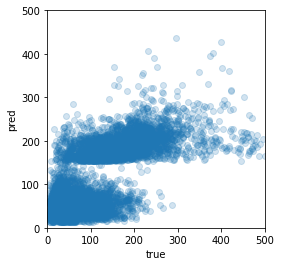

In [58]:
plt.scatter(y_dev, pred_dev, alpha = 0.2)
plt.axis('square')
plt.xlabel("true")
plt.ylabel("pred")

plt.xlim(-0.1,500)
plt.ylim(-0.1,500)



#plt.xlim(-0.1,2)
#plt.ylim(-0.1,2)


In [59]:
# --> ALLEIN die Textlänge macht 0.49 bei avgTimeOnPagePerWordcount, das ist eindeutig nicht Sinn der Normierung! :D


(-0.35313712818528603, 0.0)


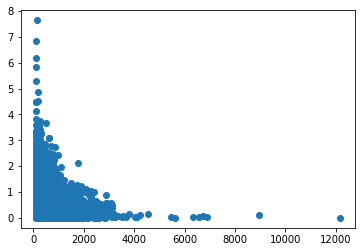

In [60]:
plt.scatter(df.nr_tokens_text, df.avgTimeOnPagePerWordcount)
print(st.pearsonr(df.nr_tokens_text, df.avgTimeOnPagePerWordcount))

(0.242942442276048, 0.0)


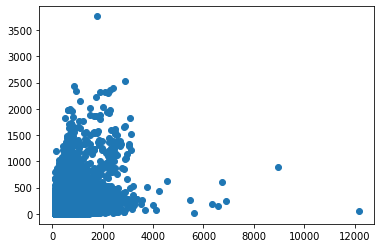

In [61]:
plt.scatter(df.nr_tokens_text, df.avgTimeOnPage)
print(st.pearsonr(df.nr_tokens_text, df.avgTimeOnPage))

## Betrachtung von 'subject' (die häufigsten 25)

In [266]:
# Achtung: ein Artikel hat mehrere Subjects, daher addiert sich das unten nicht auf die Gesamtzahl
# außerdem: manche haben kein Subject (oder jedenfalls keines der hier betrachteten)

In [267]:
subject_meta = pd.read_csv(utils.OUTPUT / 'subject_meta.tsv', sep = "\t", index_col = "articleId")

In [268]:
subject_meta

,Automobilindustrie,Bundesregierung,EU,Fernsehen,Film,Finanzen,Formel 1,Fußball,Gesellschaft,Gesundheit,...,Medien,Motorsport,Musik,Partei,Prozess (Gericht),Regierung,Tourismus,Verbraucher,Verkehr,Wissenschaft
articleId,,,,,,,,,,,,,,,,,,,,,
49297055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49307861,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49307973,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
49308023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49308055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53516443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53516491,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53516929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
for s in list(subject_meta.columns):
    print(s, subject_meta[s].sum())

Automobilindustrie 1757
Bundesregierung 1575
EU 1753
Fernsehen 2000
Film 2324
Finanzen 1521
Formel 1 1673
Fußball 21529
Gesellschaft 2506
Gesundheit 24804
Internet 2059
Konjunktur 1834
Krankheit 23791
Kriminalität 3622
Leute 6984
Medien 2849
Motorsport 2113
Musik 2659
Partei 1890
Prozess (Gericht) 1483
Regierung 2319
Tourismus 2582
Verbraucher 1551
Verkehr 2778
Wissenschaft 7704


In [270]:
subjects = subject_meta.columns
print(subjects)

Index(['Automobilindustrie', 'Bundesregierung', 'EU', 'Fernsehen', 'Film',
       'Finanzen', 'Formel 1', 'Fußball', 'Gesellschaft', 'Gesundheit',
       'Internet', 'Konjunktur', 'Krankheit', 'Kriminalität', 'Leute',
       'Medien', 'Motorsport', 'Musik', 'Partei', 'Prozess (Gericht)',
       'Regierung', 'Tourismus', 'Verbraucher', 'Verkehr', 'Wissenschaft'],
      dtype='object')


In [271]:
def get_subject_mean(df, columns):
    subject_mean = collections.defaultdict(dict)
    for sub in subjects:
        ids = subject_meta[subject_meta[sub] == 1].index # take the ones where sub == 1
        ids = [ ID for ID in ids if ID in df.index ]
        tmp = df.loc[ids]
        if len(tmp) > 0:
            for col in columns:
                mean = np.mean(tmp[col]).round(3)
                subject_mean[sub][col] = mean
            subject_mean[sub]["count"] = len(tmp)
    return subject_mean

In [272]:
df.set_index('articleId', inplace=True)

In [273]:
col_list = ['pageviews', 'nr_tokens_publisher', 'zeilen', 'avgTimeOnPage', 'avgTimeOnPagePerWordcount', 'stickiness']

pd.DataFrame.from_dict(get_subject_mean(df = df, columns = col_list), orient='index')

,pageviews,nr_tokens_publisher,zeilen,avgTimeOnPage,avgTimeOnPagePerWordcount,stickiness,count
Automobilindustrie,2593.300,369.300,41.225,120.995,0.604,47.207,40
Bundesregierung,2911.255,425.574,50.723,122.222,0.514,43.948,94
EU,731.500,424.475,57.550,137.104,2.677,44.347,40
Fernsehen,895.702,394.895,41.053,145.196,0.546,50.597,57
Film,574.667,368.909,41.727,127.042,0.544,46.567,33
Finanzen,2380.842,421.105,48.632,129.868,0.417,46.085,38
Formel 1,193.900,486.900,56.800,145.777,0.432,65.296,10
Fußball,669.426,398.893,44.548,127.399,0.554,50.852,197
Gesellschaft,1314.902,416.044,48.295,139.398,0.535,46.878,183
Gesundheit,3587.572,394.746,45.455,131.080,0.627,44.750,1403


In [274]:
pd.DataFrame.from_dict(get_subject_mean(df = full, columns = col_list), orient='index')

,pageviews,nr_tokens_publisher,zeilen,avgTimeOnPage,avgTimeOnPagePerWordcount,stickiness,count
Automobilindustrie,1403.300,164.133,49.900,114.123,inf,49.243,90
Bundesregierung,2587.548,119.772,58.332,118.114,inf,48.319,334
EU,659.207,94.855,61.877,129.342,inf,50.432,179
Fernsehen,966.897,121.670,38.686,126.944,inf,52.516,185
Film,499.758,122.970,36.242,110.602,inf,52.212,99
Finanzen,1259.109,145.473,59.509,130.885,inf,48.865,110
Formel 1,176.581,157.065,61.387,142.478,inf,63.196,31
Fußball,530.503,176.589,50.204,124.563,inf,55.131,445
Gesellschaft,951.420,213.266,54.527,131.891,inf,50.422,357
Gesundheit,2282.922,136.243,50.663,124.182,inf,50.158,4065


## --> avgTimeOnPage kann (aber erst durch Hinzufügen des Publishers als Feature) erstaunlich gut vorhergesagt werden!

## --> das gilt auch für pageviews_percentile

## avgTimeOnPagePerWordcount aber nicht!